## ConvConvPool with data augmentation

Following up with the better results on the conv-conv-pool architecture without augmentation, I decided to try this out by augmenting the dataset with a zoom factor of 0.3, just like in the convpool model.

In [1]:
import matplotlib.pyplot as plt

In [2]:
from convolutionalmodel3 import Convtrain as conv
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.,
      width_shift_range=0.,
      height_shift_range=0.,
      shear_range=0.,
      zoom_range=0.3,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/', target_size = (128,1024), batch_size = 20, 
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('validation/', target_size = (128,1024), batch_size =20,
                                                       class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('test/', target_size = (128,1024), batch_size = 20,
                                                 class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Model = conv(input_shape=(128,1024,3))
Model.compile()
print(Model.model.summary())
history = Model.fit_generator(train_generator, validation_generator, epochs=20)

Using TensorFlow backend.


Found 6394 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
data batch shape: (20, 128, 1024, 3)
labels batch shape: (20, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 512, 32)       416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 256, 32)       4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 256, 32)       128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 128, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 127, 64)       8256      
_________________________________________________________________
conv2d_4 (Conv2D)  

In [3]:
a = history.history

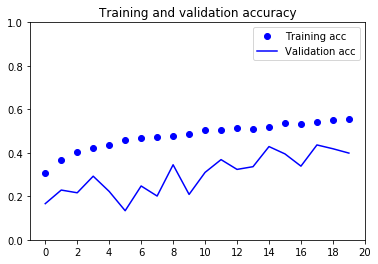

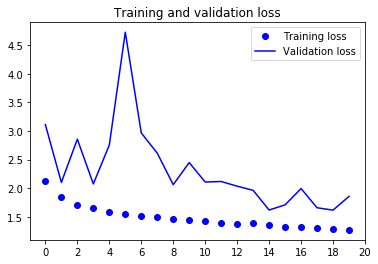

In [4]:
acc = a['acc']
val_acc = a['val_acc']
loss = a['loss']
val_loss = a['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
ax = plt.gca()
ax.set_ylim(0,1)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
ax = plt.gca()
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.show()


This looks better. Aside from the anomalous validation loss - The validation accuracies and losses are getting better. I shall run this on a larger amount of epochs to continue training and maybe increase the number of batches to train on.